### Set up libraries

In [1]:
# Setup the libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from copy import deepcopy

### Import cleaned data

In [9]:
grocery = pd.read_csv('Merged_data_20221123.csv',encoding='cp1252')
grocery = grocery.drop('Unnamed: 0', axis=1)

In [11]:
grocery.head()

,Item name,Category,Price,Unit,Unit Price,Store,Date,Product Number,Sale Price,Serving Size,...,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrate (g),Dietary Fiber (g),Total Sugars (g),Added Sugars (g),Protein (g)
0,100 Calorie Greek Yogurt (Tropical ),dairy,0.63,$/oz,0.12,Aldi,2022-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100 Calorie Greek Yogurt (Blueberry ),dairy,0.63,$/oz,0.12,Aldi,2022-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100 Calorie Greek Yogurt (Blackberry),dairy,0.63,$/oz,0.12,Aldi,2022-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100 Calorie Greek Yogurt (Strawberry),dairy,0.63,$/oz,0.12,Aldi,2022-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aged Cheddar (Four Year),dairy,3.69,$/oz,0.53,Aldi,2022-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

Look at the skewness for data

In [12]:
grocery.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Unit Price,3.540111,23.821305
Product Number,3.649261,11.320092
Sale Price,NaN,NaN
Serving Size,14.491163,290.705169
Calories,1.471418,6.161752
Total Fat (g),1.992877,9.972137
Saturated Fat (g),1.508751,4.678527
Trans Fat (g),27.920025,1001.929032
Cholesterol (mg),3.478192,16.786780
Sodium (mg),1.906081,4.570961


<AxesSubplot:xlabel='Price', ylabel='Density'>

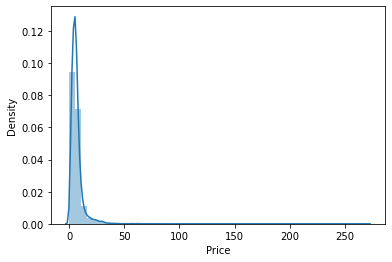

In [15]:
# Price distribution
sns.distplot(grocery['Price'])

In [16]:
grocery['Price'].describe()

count    8526.000000
mean        6.481949
std         6.562497
min         0.000000
25%         3.490000
50%         4.990000
75%         7.490000
max       269.910000
Name: Price, dtype: float64

In [17]:
grocery['Unit Price'].describe()

count    8176.000000
mean        3.412944
std         4.589478
min         0.000000
25%         0.500000
50%         1.690000
75%         4.990000
max        79.990000
Name: Unit Price, dtype: float64

In [18]:
#group by market
aldi = grocery[grocery['Store'] == 'Aldi']
tj = grocery[grocery['Store'] == 'Trader Joe\'s']
wfm = grocery[grocery['Store'] == 'Wholefoods Market']
fwm = grocery[grocery['Store'] == 'Fairway Market']
fdm = grocery[grocery['Store'] == 'Foodtown Market']

In [19]:
#group by category
dairy = grocery[grocery['Category'] == 'dairy']
produce = grocery[grocery['Category'] == 'produce']
meat = grocery[grocery['Category'] == 'meat']
seafood = grocery[grocery['Category'] == 'seafood']

In [20]:
category = pd.Series(['dairy', 'produce', 'meat', 'seafood'], name = 'Category')
category_aldi = pd.Series([len(aldi[aldi['Category'] == 'dairy']), len(aldi[aldi['Category'] == 'produce']), len(aldi[aldi['Category'] == 'meat']), len(aldi[aldi['Category'] == 'seafood'])], name = 'Aldi')
category_tj = pd.Series([len(tj[tj['Category'] == 'dairy']), len(tj[tj['Category'] == 'produce']), len(tj[tj['Category'] == 'meat']), len(tj[tj['Category'] == 'seafood'])], name = 'Trader Joe\'s')
category_wfm = pd.Series([len(wfm[wfm['Category'] == 'dairy']), len(wfm[wfm['Category'] == 'produce']), len(wfm[wfm['Category'] == 'meat']), len(wfm[wfm['Category'] == 'seafood'])], name = 'Wholefoods Market')
category_fwm = pd.Series([len(fwm[fwm['Category'] == 'dairy']), len(fwm[fwm['Category'] == 'produce']), len(fwm[fwm['Category'] == 'meat']), len(fwm[fwm['Category'] == 'seafood'])], name = 'Fairway Market')
category_fdm = pd.Series([len(fdm[fdm['Category'] == 'dairy']), len(fdm[fdm['Category'] == 'produce']), len(fdm[fdm['Category'] == 'meat']), len(fdm[fdm['Category'] == 'seafood'])], name = 'Footdown Market')

<AxesSubplot:title={'center':'Markets categories distribution'}, xlabel='Category', ylabel='Number of items'>

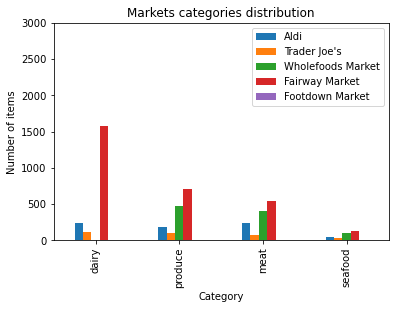

In [21]:
category_market = pd.DataFrame([category, category_aldi, category_tj, category_wfm, category_fwm, category_fdm]).T
category_market.plot(x='Category', y=['Aldi', 'Trader Joe\'s', 'Wholefoods Market', 'Fairway Market', 'Footdown Market'], kind="bar", ylim = (0,3000), title = 'Markets categories distribution', ylabel='Number of items')

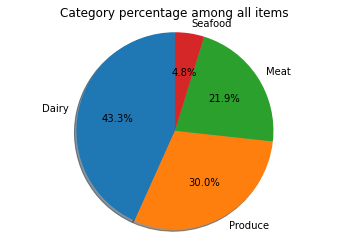

In [22]:
grocery_category_fig, ax1= plt.subplots()
ax1.pie([len(dairy), len(produce), len(meat), len(seafood)], labels=['Dairy', 'Produce', 'Meat', 'Seafood'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Category percentage among all items')
plt.show()

Word count and word cloud for most frequently appeared item name

In [23]:
Counter(" ".join(grocery['Item name']).split()).most_common(100)

[('OZ', 2713),
 ('OUNCE', 1979),
 ('Organic', 1118),
 ('POUND', 619),
 ('FOZ', 578),
 ('&', 481),
 ('Cheese', 442),
 ('LB', 436),
 ('Fresh', 389),
 ('Chicken', 365),
 ('Greek', 322),
 ('Beef', 321),
 ('Yogurt', 297),
 ('FL', 285),
 ('Milk', 247),
 ('-', 244),
 ('FLUIDOUNCEUS', 238),
 ('Whole', 229),
 ('EACH', 209),
 ('Fat', 205),
 ('Free', 199),
 ('Vanilla', 181),
 ('Smoked', 179),
 ('Original', 169),
 ('Pork', 166),
 ('Cream', 163),
 ('Strawberry', 162),
 ('Natural', 162),
 ('Turkey', 161),
 ('per', 155),
 ('Yogurt,5.3', 155),
 ('Red', 151),
 ('Cheddar', 144),
 ('Farms', 143),
 ('Chobani', 143),
 ('Green', 140),
 ('Shredded', 138),
 ('Sweet', 137),
 ('Yogurt,', 133),
 ('Sliced', 129),
 ('Baby', 129),
 ('Boneless', 126),
 ('Lowfat', 124),
 ('Cheese,8.0', 124),
 ('Cheese,', 123),
 ('with', 121),
 ('Coconut', 117),
 ('CT', 117),
 ('[Organic]', 115),
 ('Black', 114),
 ('Almond', 113),
 ('Milk,', 113),
 ('Sharp', 109),
 ('Plain', 108),
 ('White', 105),
 ('Ground', 105),
 ('Premium', 105),


In [24]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [25]:
text = ''
for i in grocery['Item name']:
  text += i

In [26]:
print(STOPWORDS)

{'herself', "we'd", 'if', 'since', 'your', 'shall', "what's", 'its', 'the', 'through', "he's", 'i', 'this', 'however', "who's", 'and', 'he', 'from', 'other', 'www', 'ours', 'her', 'doing', 'as', "shan't", 'ever', 'then', 'in', 'more', 'can', 'than', "where's", 'a', "here's", 'only', 'here', 'or', 'what', "isn't", 'should', "wouldn't", "shouldn't", "wasn't", 'did', 'were', 'k', 'no', 'you', "hasn't", 'have', 'it', "when's", "he'll", 'same', 'while', "there's", 'are', 'between', 'by', 'their', 'hers', 'against', 'also', 'some', 'own', "weren't", 'which', 'above', 'where', "that's", 'my', 'there', 'during', 'hence', "you've", "i'm", "can't", 'out', 'again', 'for', 'nor', 'com', "she'd", 'could', 'that', 'below', "didn't", 'down', 'me', "how's", 'further', 'to', 'too', 'otherwise', "haven't", 'each', "mustn't", 'these', "it's", "couldn't", 'does', 'under', "he'd", 'therefore', "they'll", 'being', 'his', "i'd", 'most', 'not', 'up', 'when', "hadn't", 'because', 'yourself', 'himself', 'both',

In [27]:
STOPWORDS.update(['oz','OZ','lb','lbs','OUNCE','-','CT','32','1','FL', 'OZOrganic', 'LBorganic', '0', 'OUNCEFairway','ouncesargento', '0','OUNCEFresh', 'POUNDFresh','POUND','POUNDOrganic'])

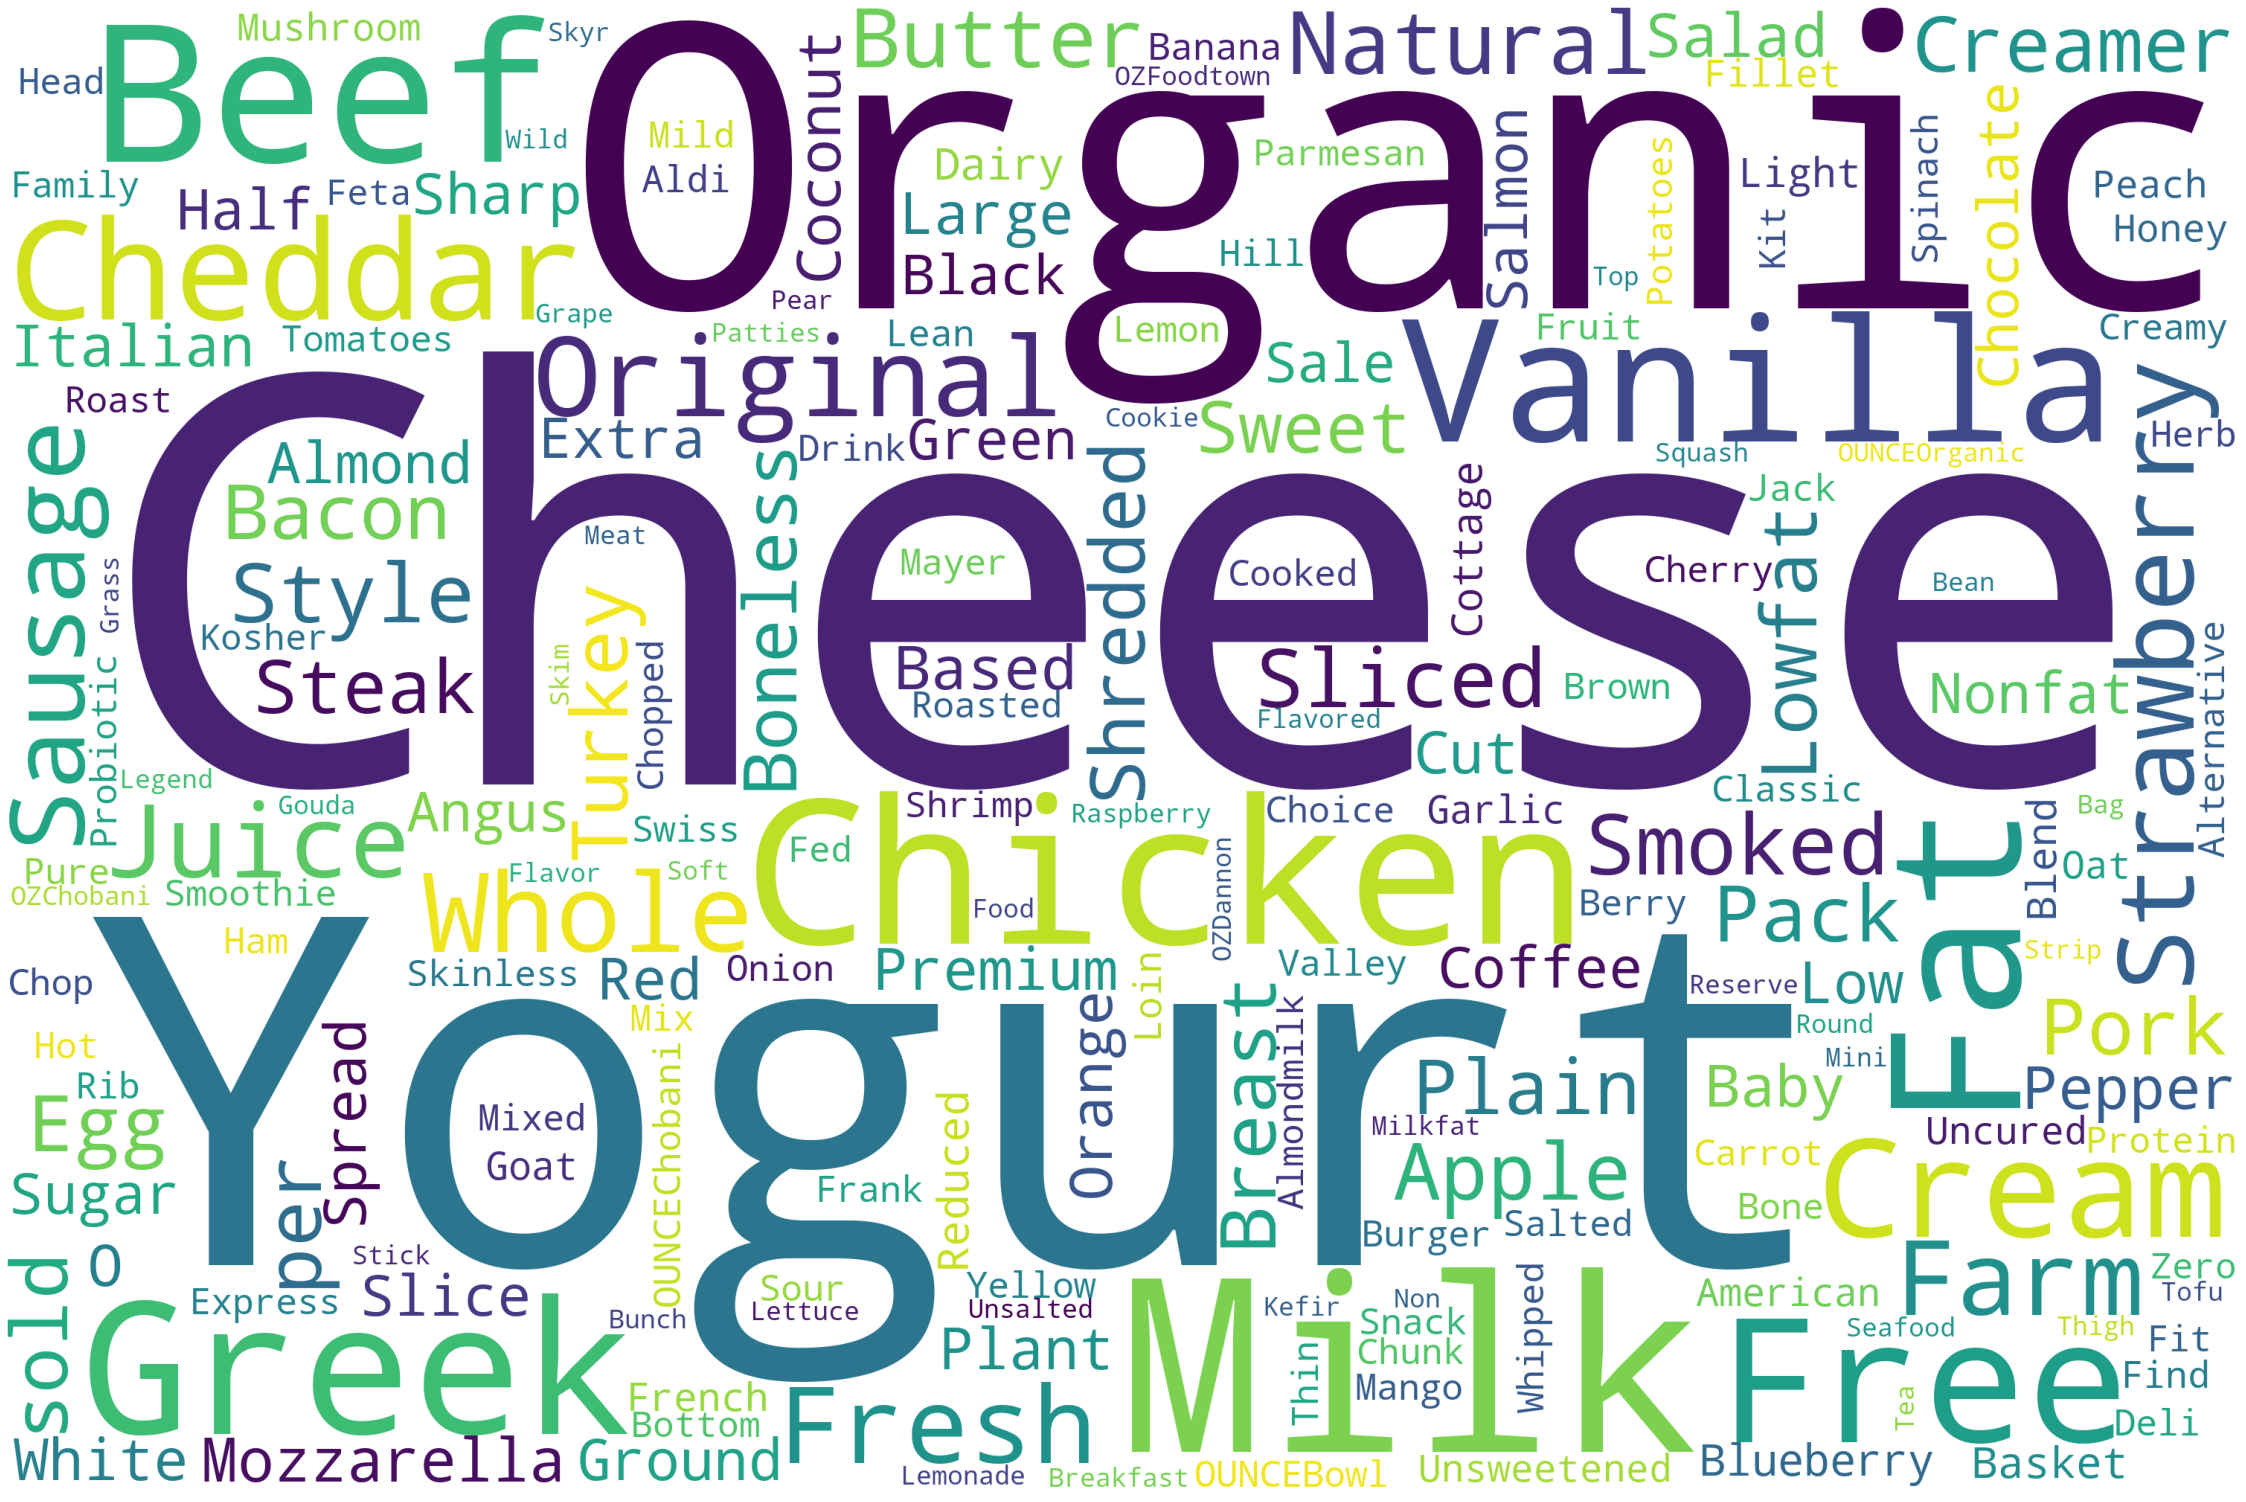

In [28]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)